# Tutorial 6
Application of Fourier spectral analysis on synthetic data.  This code deals with data that are 300 points long (from tutorial).

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Example 1: autospectrum

In [2]:
#create x1 and x2 as a superposition of synthetic signals
k = 2 * np.pi / 50
omega = [2*np.pi/150, 2*np.pi/75, 2*np.pi/20] # = [0.0419, 0.0838, 0.3142]

x = [float(kk) for kk in range(100)]
t = [float(kk) for kk in range(300)]
x = np.asarray(x).reshape(-1,1)
t = np.asarray(t).reshape(-1,1)

y0 = [0.5*np.sin(k*x[0] - omega[0]*tjj) for tjj in t]
y1 = [1.0*np.sin(k*x[16] - omega[1]*tjj) for tjj in t]
y2 = [2.0*np.sin(k*x[69] - omega[2]*tjj) for tjj in t]
y3 = [0.01*tjj for tjj in t]

#x1 is sum of these 4 signals
x1 = [y0[kk]+y1[kk]+y2[kk]+y3[kk] for kk in range(len(y0))]

#x2 is x1 with a linear trend removed
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(t,x1)
ypred_MLR = lm_MLR.predict(np.asarray(t).reshape(-1,1)) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
x2 = x1 - ypred_MLR

x1 = np.squeeze(np.asarray(x1))
x2 = np.squeeze(np.asarray(x2))


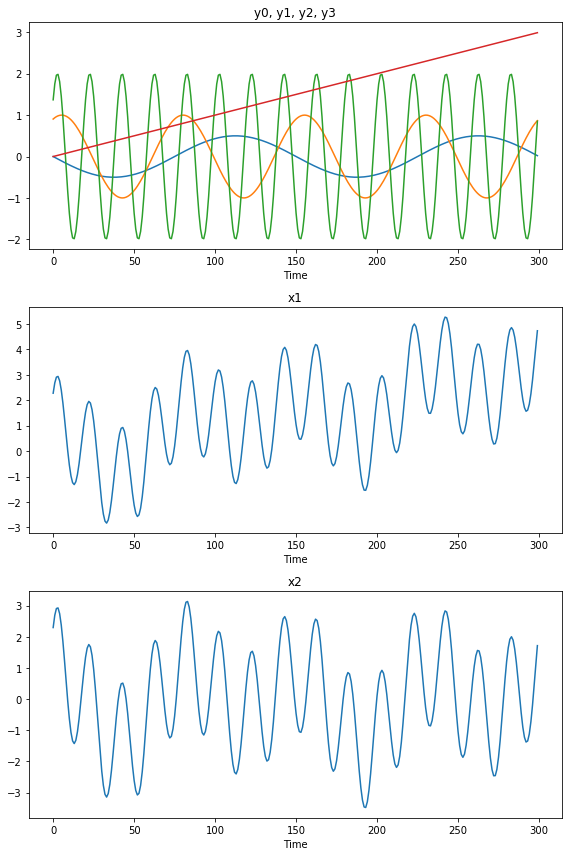

In [3]:
#visualize

plt.figure(figsize=(8,12))

plt.subplot(311)
plt.plot(y0)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.title('y0, y1, y2, y3')
plt.xlabel('Time')

plt.subplot(312)
plt.plot(x1)
plt.title('x1')
plt.xlabel('Time')

plt.subplot(313)
plt.plot(x2)
plt.title('x2')
plt.xlabel('Time')

plt.tight_layout()
plt.show()

In [76]:
#calculate autospectrum
x1fft = np.fft.fft(np.asarray(x1))
Sx1 = np.abs(np.square(x1fft))
freq1 = np.fft.fftfreq(np.arange(len(x1fft)).shape[-1]) #frequency

x2fft = np.fft.fft(x2)
Sx2 = np.abs(np.square(x2fft))
freq2 = np.fft.fftfreq(np.arange(len(x2fft)).shape[-1]) #frequency


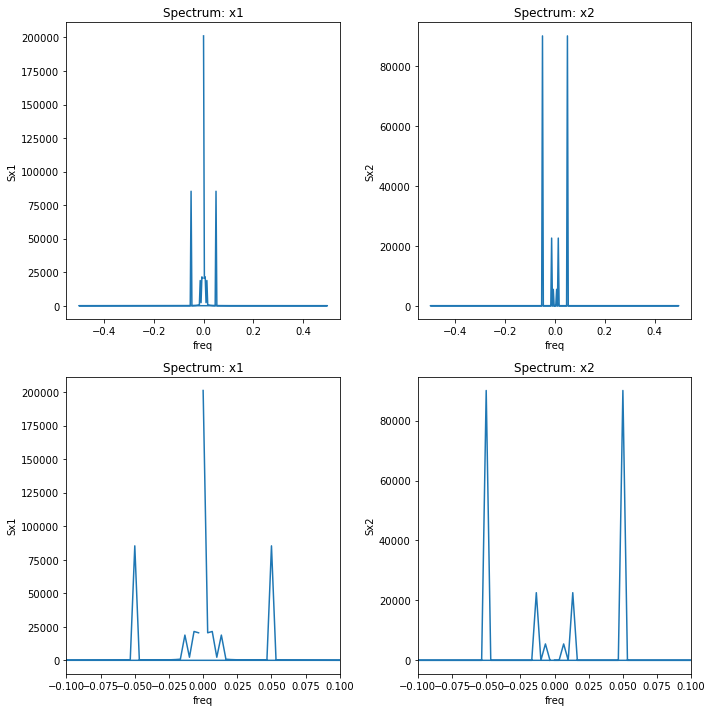

In [10]:
#visualize

plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(freq1,Sx1)
plt.xlabel('freq')
plt.ylabel('Sx1')
plt.title('Spectrum: x1')

plt.subplot(222)
plt.plot(freq2,Sx2)
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')

plt.subplot(223)
plt.plot(freq1,Sx1)
plt.xlabel('freq')
plt.ylabel('Sx1')
plt.title('Spectrum: x1')
plt.xlim((-0.1,0.1))

plt.subplot(224)
plt.plot(freq2,Sx2)
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')
plt.xlim((-0.1,0.1))

plt.tight_layout()
plt.show()

Note that the spectrum of x1 has a lot of power at zero frequency (ie: from mean of signal).  This is not present in x2 because we removed the trend which (in this case) gave rise to the power at zero frequency.  Both spectra have peaks at the three frequencies corresponding to y0, y1, and y2.

In [44]:
#variance in Fourier bands (% of total power in each band)

energy1 = np.sort(Sx1)[::-1] * 100/np.sum(Sx1)
ind1 = [np.argwhere(100*Sx1/np.sum(Sx1)==energy_kk)[0][0] for energy_kk in energy1]

energy2 = np.sort(Sx2)[::-1] * 100/np.sum(Sx2)
ind2 = [np.argwhere(100*Sx2/np.sum(Sx2)==energy_kk)[0][0] for energy_kk in energy2]

#known energy in signals (since we know the amplitudes were 0.5, 1, and 2)
eng = np.array([0.5,1.,2.])
eng = 100*eng**2/np.sum(eng**2)

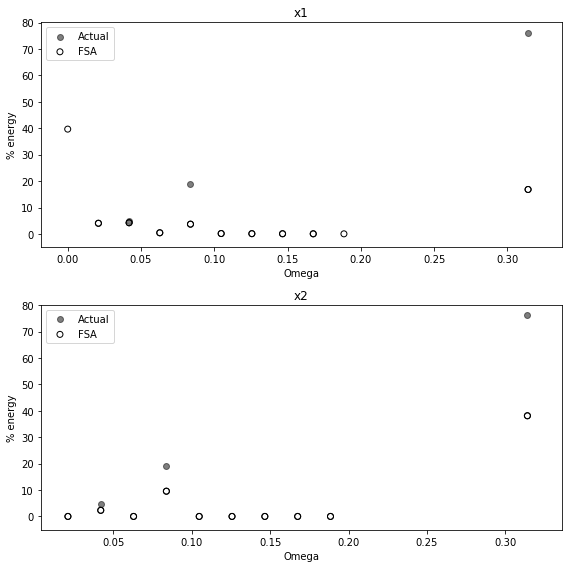

In [61]:
#visualize energy per frequency (real and derived from FSA)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.scatter(omega,eng,color='k',alpha = 0.5)
plt.scatter(2*np.pi*freq1[ind1[:20]],energy1[:20],facecolors=[],edgecolors='k')
plt.xlabel('Omega')
plt.ylabel('% energy')
plt.title('x1')
plt.legend(('Actual','FSA'))

plt.subplot(2,1,2)
plt.scatter(omega,eng,color='k',alpha = 0.5)
plt.scatter(2*np.pi*freq2[ind2[:20]],energy2[:20],facecolors=[],edgecolors='k')
plt.xlabel('Omega')
plt.ylabel('% energy')
plt.title('x2')
plt.legend(('Actual','FSA'))

plt.tight_layout()
plt.show()

## Example 2: Aliasing
Let's assume we sample the signal x1 at fewer points.  The signal with max frequency has a time period (theta) = 20.  We need at least 2 points to cover this period (the original signal has 20 points in theta, so dt = 1).

In [82]:
#set dt, calculate resampled variables and spectra

dN = 3 #sampling interval
ind = np.arange(0,300,dN)
dt = 300/len(ind)
x2_new = [x2[ind_jj] for ind_jj in ind] 
freq = 1/dt #new sampling frequency
omega_N = np.pi/dt #nyquist angular frequency

x2fft_new = np.fft.fft(x2_new)
Sx2_new = np.abs(np.square(x2fft_new))
freq2_new = np.fft.fftfreq(np.arange(len(x2fft_new)).shape[-1],d=dN) #frequency


(-0.1, 0.1)

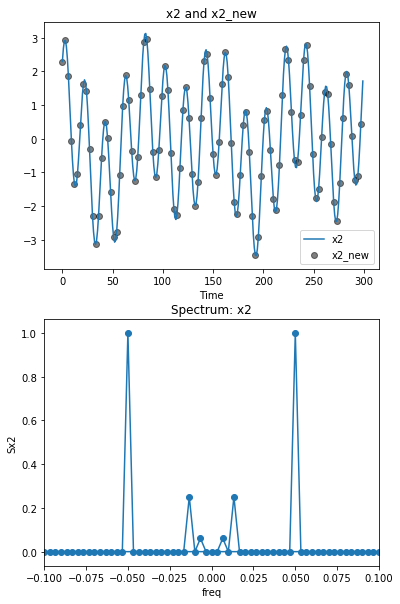

In [89]:
#visualize

plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.plot(t,x2)
plt.scatter(ind,x2_new,color='k',alpha=0.5)
plt.legend(('x2','x2_new'))
plt.xlabel('Time')
plt.title('x2 and x2_new')

plt.subplot(2,1,2)
plt.plot(freq2,Sx2/np.max(Sx2))
plt.scatter(freq2_new,Sx2_new/np.max(Sx2_new))
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')
plt.xlim((-0.1,0.1))

plt.tight_layout()
plt.show()


In [92]:
#set dt, calculate resampled variables and spectra

dN = 9 #sampling interval
ind = np.arange(0,300,dN)
dt = 300/len(ind)
x2_new = [x2[ind_jj] for ind_jj in ind] 
freq = 1/dt #new sampling frequency
omega_N = np.pi/dt #nyquist angular frequency

x2fft_new = np.fft.fft(x2_new)
Sx2_new = np.abs(np.square(x2fft_new))
freq2_new = np.fft.fftfreq(np.arange(len(x2fft_new)).shape[-1]) #frequency


In [ ]:
#visualize

plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.plot(t,x2)
plt.scatter(ind,x2_new,color='k',alpha=0.5)
plt.legend(('x2','x2_new'))
plt.xlabel('Time')
plt.title('x2 and x2_new')

plt.subplot(2,1,2)
plt.plot(freq2,Sx2/np.max(Sx2))
plt.scatter(freq2_new,Sx2_new/np.max(Sx2_new))
plt.xlabel('freq')
plt.ylabel('Sx2')
plt.title('Spectrum: x2')
plt.xlim((-0.1,0.1))

plt.tight_layout()
plt.show()
